In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder as ce
from datetime import datetime
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error , classification_report ,recall_score , precision_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.svm import SVC , SVR
%matplotlib inline


In [2]:
#import data
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.sample(5)

id  gender   age hypertension heart_disease ever_married  \
2130  55220    Male  53.0           NO            NO          Yes   
2612  49972    Male  63.0           NO            NO          Yes   
967    5694    Male  21.0           NO            NO           No   
37    24977  Female  72.0          YES            NO          Yes   
3849  70992  Female   8.0           NO            NO           No   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
2130        Private          Urban              76.03  27,3     never smoked   
2612  Self-employed          Rural             216.38  34,5     never smoked   
967         Private          Rural             102.05  29,9     never smoked   
37          Private          Rural              74.63  23,1  formerly smoked   
3849       children          Urban              74.42  22,5          Unknown   

     stroke  
2130     NO  
2612     NO  
967      NO  
37      YES  
3849     NO

In [3]:
#cleansing
#investing
df.shape

(5110, 12)

In [4]:
df.describe().T

count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
avg_glucose_level     91.885    114.09    271.74

In [5]:
df.describe(include='O').T

count unique           top  freq
gender          5110      3        Female  2994
hypertension    5110      2            NO  4612
heart_disease   5110      2            NO  4834
ever_married    5110      2           Yes  3353
work_type       5110      5       Private  2925
Residence_type  5110      2         Urban  2596
bmi             4909    418          28,7    41
smoking_status  5110      4  never smoked  1892
stroke          5110      2            NO  4861

In [6]:
df.describe(include='all').T

count unique           top  freq          mean  \
id                 5110.0    NaN           NaN   NaN  36517.829354   
gender               5110      3        Female  2994           NaN   
age                5110.0    NaN           NaN   NaN     43.226614   
hypertension         5110      2            NO  4612           NaN   
heart_disease        5110      2            NO  4834           NaN   
ever_married         5110      2           Yes  3353           NaN   
work_type            5110      5       Private  2925           NaN   
Residence_type       5110      2         Urban  2596           NaN   
avg_glucose_level  5110.0    NaN           NaN   NaN    106.147677   
bmi                  4909    418          28,7    41           NaN   
smoking_status       5110      4  never smoked  1892           NaN   
stroke               5110      2            NO  4861           NaN   

                            std    min       25%      50%      75%      max  
id                 21161.721625   67.0  17741.25  36932.0  54682.0  72940.0  
gender                      NaN    NaN       NaN      NaN      NaN      NaN  
age                   22.612647   0.08      25.0     45.0     61.0     82.0  
hypertension                NaN    NaN       NaN      NaN      NaN      NaN  
heart_disease               NaN    NaN       NaN      NaN      NaN      NaN  
ever_married                NaN    NaN       NaN      NaN      NaN      NaN  
work_type                   NaN    NaN       NaN      NaN      NaN      NaN  
Residence_type              NaN    NaN       NaN      NaN      NaN      NaN  
avg_glucose_level      45.28356  55.12    77.245   91.885   114.09   271.74  
bmi                         NaN    NaN       NaN      NaN      NaN      NaN  
smoking_status              NaN    NaN       NaN      NaN      NaN      NaN  
stroke                      NaN    NaN       NaN      NaN      NaN      NaN

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                   object
smoking_status        object
stroke                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 479.2+ KB


In [9]:
#check duplicates
df.duplicated().sum()

0

In [10]:
#check missing value
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#normalization missing value
df.isna().sum()/len(df) * 100
df.isna().sum()/df.shape[0] * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [12]:
df.isna().mean() * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [13]:
#convert bmi to float
def convert_bmi(x):
    #if type(x) == str .. else return x 
    try :
        return float(x.split(',')[0] +'.'+x.split(',')[1])
        #return float(x.replace(',','.'))
    except :
        return x 
df['bmi']=df['bmi'].apply(convert_bmi)    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In [14]:
#handle missing values
#create knn imputer object
knn = KNNImputer(n_neighbors=3)
df['bmi']=knn.fit_transform(df[['bmi']])
#df['bmi']=df['bmi'].fillna(any strategy)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In [16]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:
#drop unnecessary columns
#no need for  prediction phase
df.drop('id',axis=1,inplace=True)

In [18]:
#check rows 
#check unique id and logic
#check object
for i in  df.select_dtypes('object'):
    print(f'for {i} : \n',df[i].value_counts())
    print('-'*60)

for gender : 
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------------------------------------------
for hypertension : 
 NO     4612
YES     498
Name: hypertension, dtype: int64
------------------------------------------------------------
for heart_disease : 
 NO     4834
YES     276
Name: heart_disease, dtype: int64
------------------------------------------------------------
for ever_married : 
 Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------------------------------------------
for work_type : 
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------------------------------------------------
for residence_type : 
 Urban    2596
Rural    2514
Name: residence_type, dtype: int64
------------------------------------------------------------
for smoking_status : 
 never smoked       1892
Unknown            1

In [19]:
#drop unnedded rows
x=df[df['gender'] == 'Other'].index
df.drop(x,axis=0,inplace=True)
df.reset_index(inplace=True)

In [20]:
df.drop('index',inplace=True,axis=1)
df

gender   age hypertension heart_disease ever_married      work_type  \
0       Male  67.0           NO           YES          Yes        Private   
1     Female  61.0           NO            NO          Yes  Self-employed   
2       Male  80.0           NO           YES          Yes        Private   
3     Female  49.0           NO            NO          Yes        Private   
4     Female  79.0          YES            NO          Yes  Self-employed   
...      ...   ...          ...           ...          ...            ...   
5104  Female  80.0          YES            NO          Yes        Private   
5105  Female  81.0           NO            NO          Yes  Self-employed   
5106  Female  35.0           NO            NO          Yes  Self-employed   
5107    Male  51.0           NO            NO          Yes        Private   
5108  Female  44.0           NO            NO          Yes       Govt_job   

     residence_type  avg_glucose_level        bmi   smoking_status stroke  
0             Urban             228.69  36.600000  formerly smoked    YES  
1             Rural             202.21  28.893237     never smoked    YES  
2             Rural             105.92  32.500000     never smoked    YES  
3             Urban             171.23  34.400000           smokes    YES  
4             Rural             174.12  24.000000     never smoked    YES  
...             ...                ...        ...              ...    ...  
5104          Urban              83.75  28.893237     never smoked     NO  
5105          Urban             125.20  40.000000     never smoked     NO  
5106          Rural              82.99  30.600000     never smoked     NO  
5107          Rural             166.29  25.600000  formerly smoked     NO  
5108          Urban              85.28  26.200000          Unknown     NO  

[5109 rows x 11 columns]

In [21]:
#check numeric
df.describe().T
df[df['age'] < 1]

gender   age hypertension heart_disease ever_married work_type  \
363   Female  0.64           NO            NO           No  children   
376   Female  0.88           NO            NO           No  children   
564   Female  0.32           NO            NO           No  children   
982     Male  0.88           NO            NO           No  children   
996     Male  0.24           NO            NO           No  children   
1093  Female  0.32           NO            NO           No  children   
1206  Female  0.72           NO            NO           No  children   
1317    Male  0.80           NO            NO           No  children   
1600    Male  0.40           NO            NO           No  children   
1614  Female  0.08           NO            NO           No  children   
1808  Female  0.64           NO            NO           No  children   
1975    Male  0.56           NO            NO           No  children   
1999    Male  0.24           NO            NO           No  children   
2008    Male  0.56           NO            NO           No  children   
2012    Male  0.64           NO            NO           No  children   
2030    Male  0.48           NO            NO           No  children   
2358    Male  0.88           NO            NO           No  children   
2481    Male  0.88           NO            NO           No  children   
2490    Male  0.88           NO            NO           No  children   
2579    Male  0.32           NO            NO           No  children   
2630  Female  0.80           NO            NO           No  children   
2801    Male  0.80           NO            NO           No  children   
2875    Male  0.64           NO            NO           No  children   
2898    Male  0.24           NO            NO           No  children   
3250    Male  0.56           NO            NO           No  children   
3294    Male  0.08           NO            NO           No  children   
3391    Male  0.24           NO            NO           No  children   
3439    Male  0.56           NO            NO           No  children   
3617    Male  0.16           NO            NO           No  children   
3625    Male  0.80           NO            NO           No  children   
3858    Male  0.32           NO            NO           No  children   
3893  Female  0.56           NO            NO           No  children   
3967    Male  0.16           NO            NO           No  children   
4006    Male  0.72           NO            NO           No  children   
4020    Male  0.16           NO            NO           No  children   
4052  Female  0.48           NO            NO           No  children   
4292    Male  0.24           NO            NO           No  children   
4408  Female  0.72           NO            NO           No  children   
4580  Female  0.40           NO            NO           No  children   
4644  Female  0.48           NO            NO           No  children   
4909  Female  0.32           NO            NO           No  children   
4928    Male  0.72           NO            NO           No  children   
5088  Female  0.72           NO            NO           No  children   

     residence_type  avg_glucose_level        bmi smoking_status stroke  
363           Urban              83.82  24.900000        Unknown     NO  
376           Rural              88.11  15.500000        Unknown     NO  
564           Rural              73.71  16.200000        Unknown     NO  
982           Rural             157.57  19.200000        Unknown     NO  
996           Rural             118.87  16.300000        Unknown     NO  
1093          Rural              55.86  16.000000        Unknown     NO  
1206          Urban              66.36  23.000000        Unknown     NO  
1317          Rural              98.67  17.500000        Unknown     NO  
1600          Urban             109.56  14.300000        Unknown     NO  
1614          Urban             139.67  14.100000        Unknown     NO  
1808          Urban    

In [22]:
#no domain knowledge feature
#strig operation
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [23]:
def fix_work (x):
    if x == 'children' :
        return 'Never_worked'
    else :
        return x
df['work_type']=df['work_type'].apply(fix_work)

In [24]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64

In [25]:
#detec and handle outliers 
#no outlier needed to be deleted

In [26]:
#data understanding
#univariate analysis
for i in df.columns:
    print()
    fig=px.histogram(df,i,title=f'{i}',color_discrete_sequence=['blue'],marginal='box',text_auto=True)
    fig.update_layout(title_x=0.5)
    fig.show()
    print("-------------------------------------------------------------------------------")


-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------


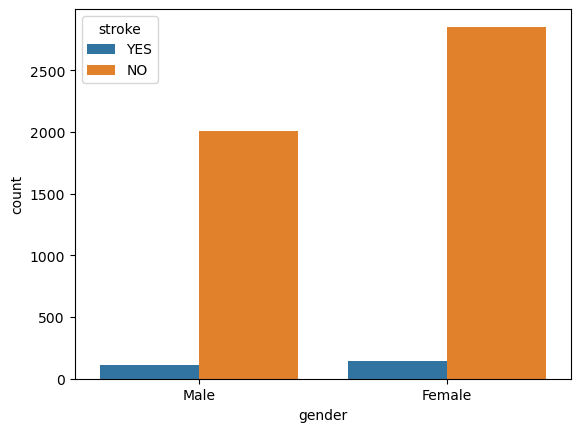

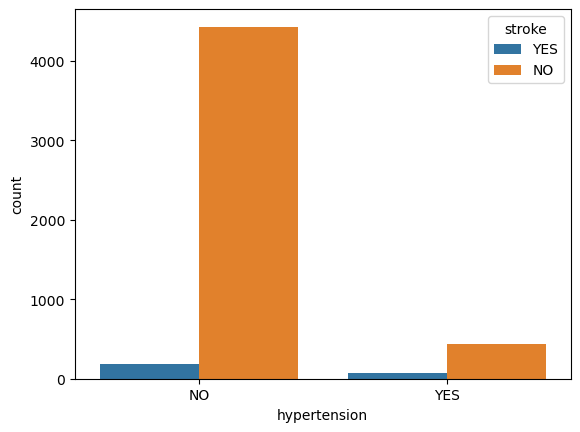

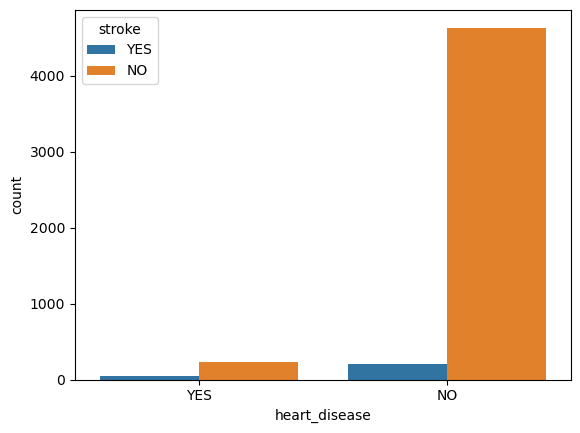

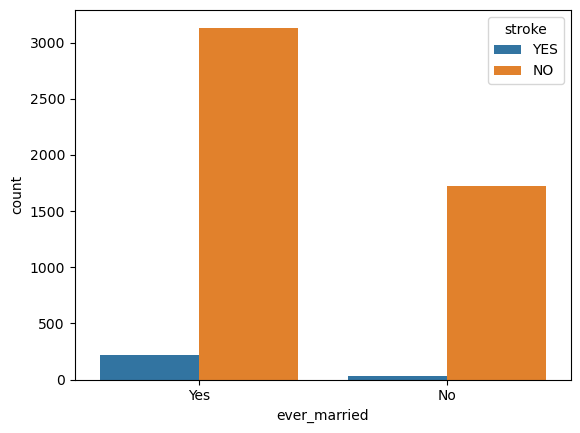

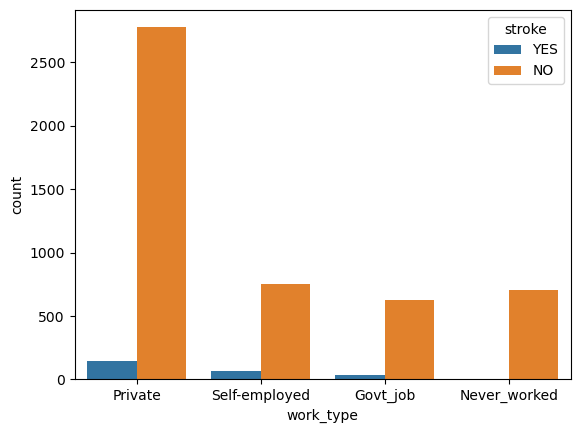

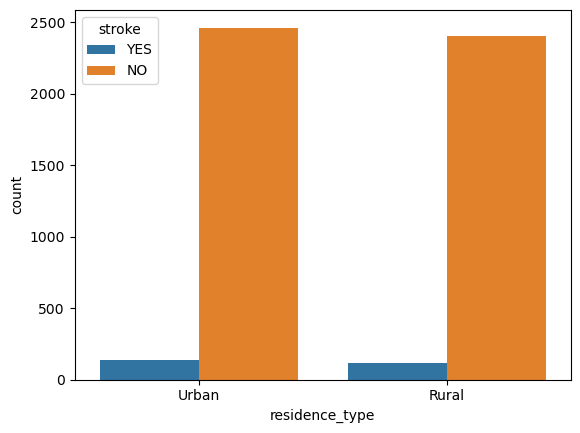

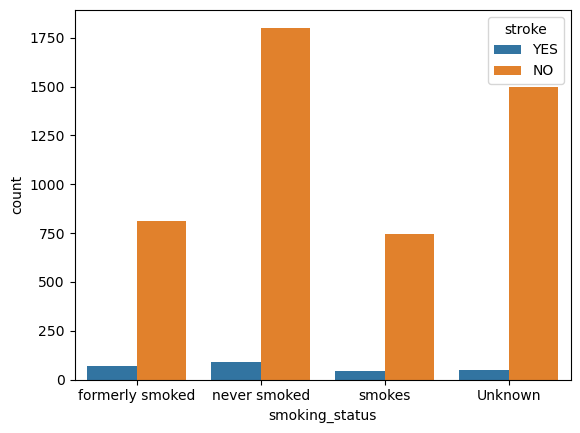

<Figure size 640x480 with 0 Axes>

In [27]:
#bivariete analysis
#for object
for i in df.columns :
    if i == 'stroke' or i == 'bmi' or i == 'age' or i == 'avg_glucose_level':
        continue
    else :
        sns.countplot(data=df,x=f'{i}',hue='stroke')
        plt.figure()
        
        

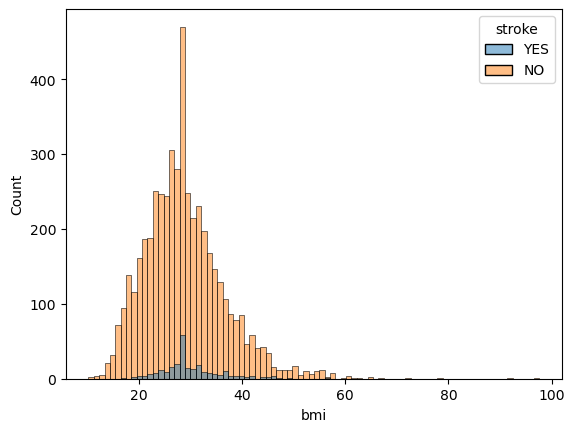

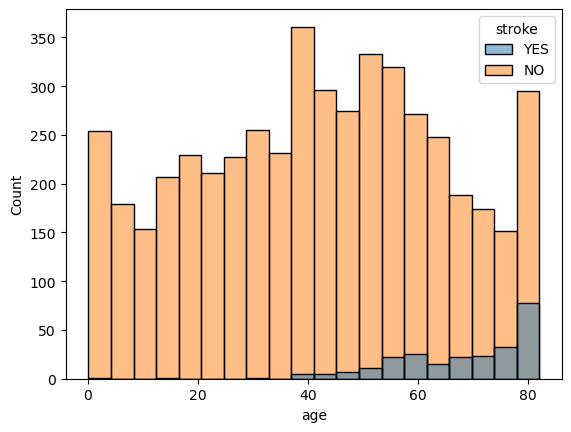

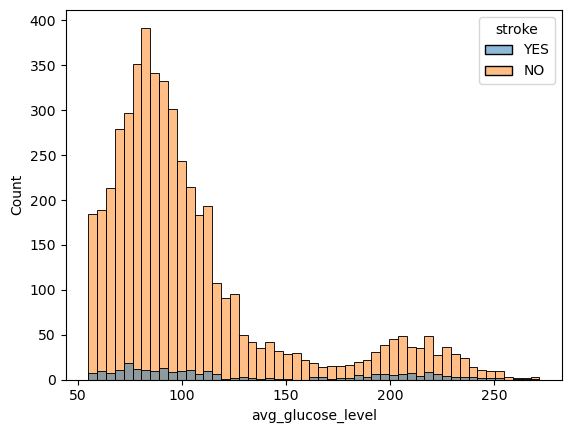

<Figure size 640x480 with 0 Axes>

In [28]:
#for numeric
lst=['bmi','age','avg_glucose_level']
for i in lst :
    sns.histplot(data=df,x=f'{i}',hue='stroke')
    plt.figure()
        

<AxesSubplot:>

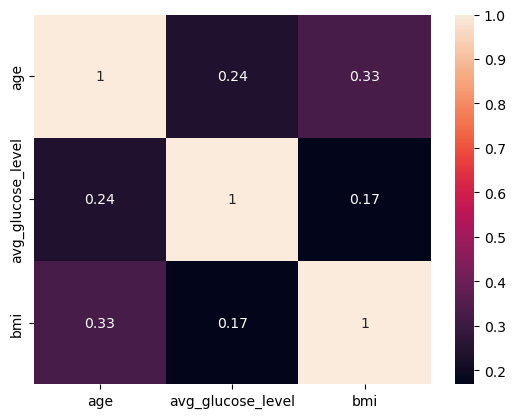

In [29]:
#correlation
sns.heatmap(df.select_dtypes('number').corr(), annot=True )

In [30]:
#encoding
#work with categorical data 
#check and decide the encoding stategy
#update objects list
lst_obj=[]
for i in df.select_dtypes('object') :
    lst_obj.append(i)
for i in lst_obj:
    print(f"for feature {i} : ",df[i].nunique())
    print()

for feature gender :  2

for feature hypertension :  2

for feature heart_disease :  2

for feature ever_married :  2

for feature work_type :  4

for feature residence_type :  2

for feature smoking_status :  4

for feature stroke :  2



In [31]:
lst_obj.remove('stroke')

In [32]:
df_c=df.copy()
df_c.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   object 
 3   heart_disease      5109 non-null   object 
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.2+ KB


In [34]:
#work with ordinal
#target feature
df['stroke'].unique()

array(['YES', 'NO'], dtype=object)

In [35]:
dic = {
    'YES' : 1 ,
    'NO' : 0   
}
df_c['stroke']=df_c['stroke'].map(dic)

In [36]:
#work with nominal
#one hot encoding
#create one hot enconding object
ohe = OneHotEncoder(sparse=False)
df_ohe = pd.DataFrame(ohe.fit_transform(df_c[lst_obj]) , columns=ohe.get_feature_names_out())

In [37]:
df_ohe

gender_Female  gender_Male  hypertension_NO  hypertension_YES  \
0               0.0          1.0              1.0               0.0   
1               1.0          0.0              1.0               0.0   
2               0.0          1.0              1.0               0.0   
3               1.0          0.0              1.0               0.0   
4               1.0          0.0              0.0               1.0   
...             ...          ...              ...               ...   
5104            1.0          0.0              0.0               1.0   
5105            1.0          0.0              1.0               0.0   
5106            1.0          0.0              1.0               0.0   
5107            0.0          1.0              1.0               0.0   
5108            1.0          0.0              1.0               0.0   

      heart_disease_NO  heart_disease_YES  ever_married_No  ever_married_Yes  \
0                  0.0                1.0              0.0               1.0   
1                  1.0                0.0              0.0               1.0   
2                  0.0                1.0              0.0               1.0   
3                  1.0                0.0              0.0               1.0   
4                  1.0                0.0              0.0               1.0   
...                ...                ...              ...               ...   
5104               1.0                0.0              0.0               1.0   
5105               1.0                0.0              0.0               1.0   
5106               1.0                0.0              0.0               1.0   
5107               1.0                0.0              0.0               1.0   
5108               1.0                0.0              0.0               1.0   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                    0.0                     0.0                1.0   
1                    0.0                     0.0                0.0   
2                    0.0                     0.0                1.0   
3                    0.0                     0.0                1.0   
4                    0.0                     0.0                0.0   
...                  ...                     ...                ...   
5104                 0.0                     0.0                1.0   
5105                 0.0                     0.0                0.0   
5106                 0.0                     0.0                0.0   
5107                 0.0                     0.0                1.0   
5108                 1.0                     0.0                0.0   

      work_type_Self-employed  residence_type_Rural  residence_type_Urban  \
0                         0.0                   0.0                   1.0   
1                         1.0                   1.0                   0.0   
2                         0.0                   1.0                   0.0   
3                         0.0                   0.0                   1.0   
4                         1.0                   1.0                   0.0   
...                       ...                   ...                   ...   
5104                      0.0                   0.0                   1.0   
5105                      1.0                   0.0                   1.0   
5106                      1.0                   1.0                   0.0   
5107                      0.0                   1.0                   0.0   
5108                      0.0                   0.0                   1.0   

      smoking_status_Unknown  smoking_status_formerly smoked  \
0                        0.0                             1.0   
1                        0.0                             0.0   
2                        0.0                             0.0   
3                        0.0                             0.0   
4                        0.0                             0.0   
...                      ...  

In [38]:
df_c=pd.concat([df_c,df_ohe],axis=1)
df_c.drop(lst_obj,axis=1,inplace=True)
df_c

age  avg_glucose_level        bmi  stroke  gender_Female  gender_Male  \
0     67.0             228.69  36.600000       1            0.0          1.0   
1     61.0             202.21  28.893237       1            1.0          0.0   
2     80.0             105.92  32.500000       1            0.0          1.0   
3     49.0             171.23  34.400000       1            1.0          0.0   
4     79.0             174.12  24.000000       1            1.0          0.0   
...    ...                ...        ...     ...            ...          ...   
5104  80.0              83.75  28.893237       0            1.0          0.0   
5105  81.0             125.20  40.000000       0            1.0          0.0   
5106  35.0              82.99  30.600000       0            1.0          0.0   
5107  51.0             166.29  25.600000       0            0.0          1.0   
5108  44.0              85.28  26.200000       0            1.0          0.0   

      hypertension_NO  hypertension_YES  heart_disease_NO  heart_disease_YES  \
0                 1.0               0.0               0.0                1.0   
1                 1.0               0.0               1.0                0.0   
2                 1.0               0.0               0.0                1.0   
3                 1.0               0.0               1.0                0.0   
4                 0.0               1.0               1.0                0.0   
...               ...               ...               ...                ...   
5104              0.0               1.0               1.0                0.0   
5105              1.0               0.0               1.0                0.0   
5106              1.0               0.0               1.0                0.0   
5107              1.0               0.0               1.0                0.0   
5108              1.0               0.0               1.0                0.0   

      ...  work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0     ...                 0.0                     0.0                1.0   
1     ...                 0.0                     0.0                0.0   
2     ...                 0.0                     0.0                1.0   
3     ...                 0.0                     0.0                1.0   
4     ...                 0.0                     0.0                0.0   
...   ...                 ...                     ...                ...   
5104  ...                 0.0                     0.0                1.0   
5105  ...                 0.0                     0.0                0.0   
5106  ...                 0.0                     0.0                0.0   
5107  ...                 0.0                     0.0                1.0   
5108  ...                 1.0                     0.0                0.0   

      work_type_Self-employed  residence_type_Rural  residence_type_Urban  \
0                         0.0                   0.0                   1.0   
1                         1.0                   1.0                   0.0   
2                         0.0                   1.0                   0.0   
3                         0.0                   0.0                   1.0   
4                         1.0                   1.0                   0.0   
...                       ...                   ...                   ...   
5104                      0.0                   0.0                   1.0   
5105                      1.0                   0.0                   1.0   
5106                      1.0                   1.0                   0.0   
5107                      0.0                   1.0                   0.0   
5108                      0.0                   0.0                   1.0   

      smoking_status_Unknown  smoking_status_formerly smoked  \
0                        0.0                             1.0   
1                        0.0                             0.0   
2                        0.0                           

In [39]:
#check if there are no categorical data left
lst_obj_c=[]
for i in df_c.columns:
    if df_c[i].dtype == 'O':
        lst_obj_c.append(i)
print(lst_obj_c)  
if len(lst_obj_c) == 0 :
    print('There is no categorical data left')
else :
    print('There is categorical data left') 

[]
There is no categorical data left


In [40]:
#split data
x , y = df_c.drop(['stroke'] , axis = 1 ) , df_c['stroke']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.15 , random_state=7 , stratify=y)

In [41]:
#standard scaling
#create standrad scaler object
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

In [42]:
#check the imbalancing classes of the target
print(y_train.value_counts(),'\n')
px.pie(y_train,names=y_train)

0    4130
1     212
Name: stroke, dtype: int64 



In [43]:
#handle imbalanced classes with smote sampling
#create smote smapling object
sm = SMOTE(sampling_strategy={1 : 4000})

In [44]:
#resampling
x_train , y_train= sm.fit_resample(x_train , y_train)

In [45]:
#check again
print(y_train.value_counts(),'\n')
px.pie(y_train,names=y_train)

0    4130
1    4000
Name: stroke, dtype: int64 



In [46]:
#modeling ---> donot forget to scale before modeling
Models = [
    ('LR',LogisticRegression()),
    ('KNNC' , KNeighborsClassifier(n_neighbors=3)),
    ('SVC' , SVC()),
    ('DT' , DecisionTreeClassifier(max_depth=3)),
    ('RF' , RandomForestClassifier())
]

LR
Training set pred recall score :  83.0 %
Test set  pred recall score :  89.0 %
matrix for train : 



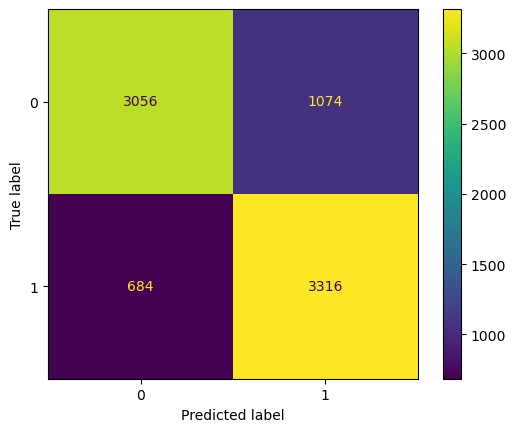

matrix for test : 



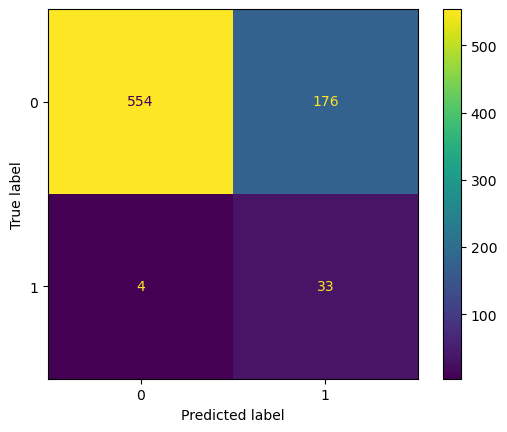

------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



KNNC
Training set pred recall score :  99.0 %
Test set  pred recall score :  22.0 %
matrix for train : 



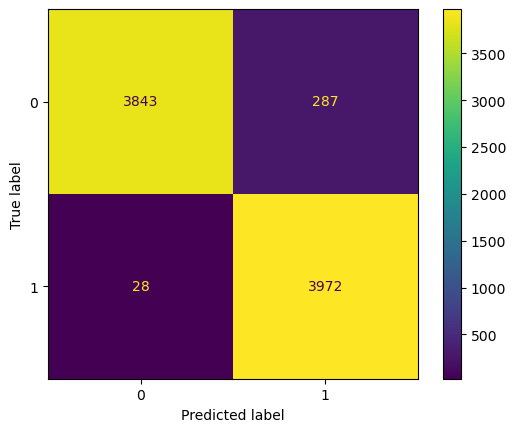

matrix for test : 



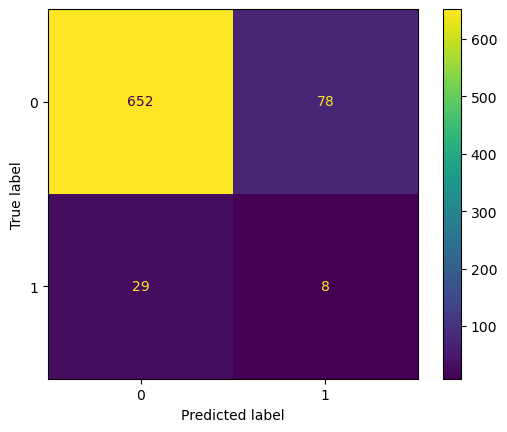

------------------------------
SVC
Training set pred recall score :  94.0 %
Test set  pred recall score :  49.0 %
matrix for train : 



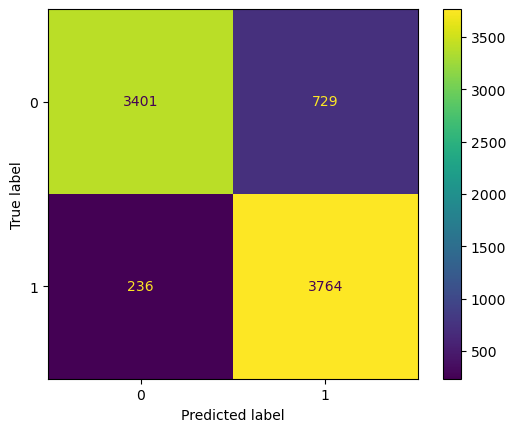

matrix for test : 



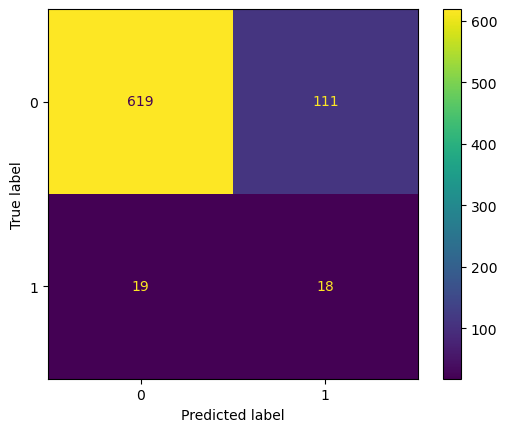

------------------------------
DT
Training set pred recall score :  87.0 %
Test set  pred recall score :  81.0 %
matrix for train : 



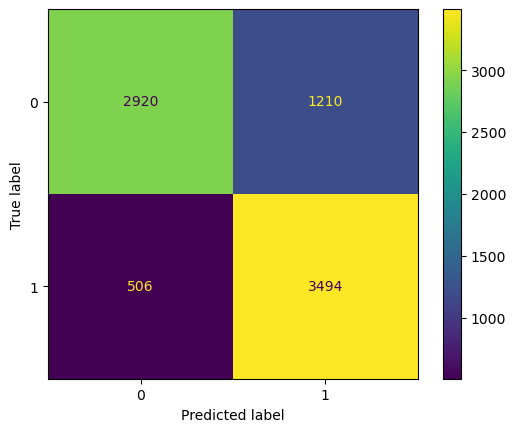

matrix for test : 



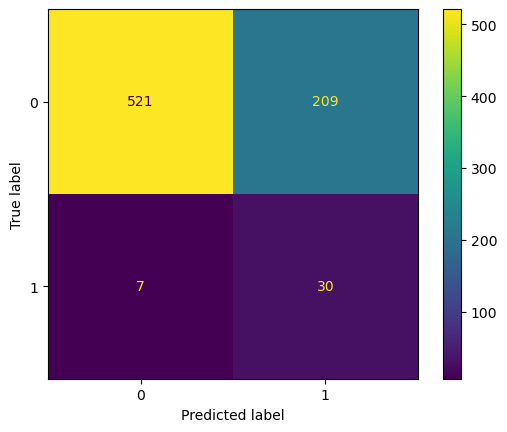

------------------------------
RF
Training set pred recall score :  100.0 %
Test set  pred recall score :  14.000000000000002 %
matrix for train : 



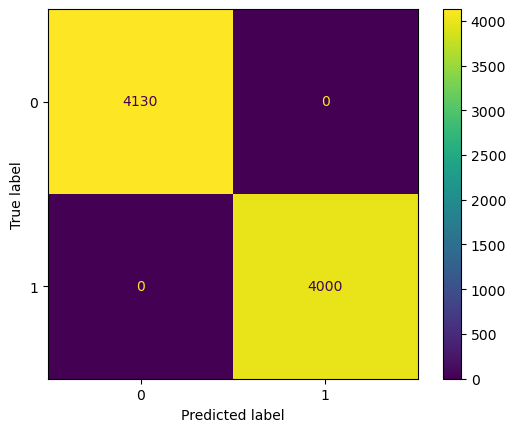

matrix for test : 



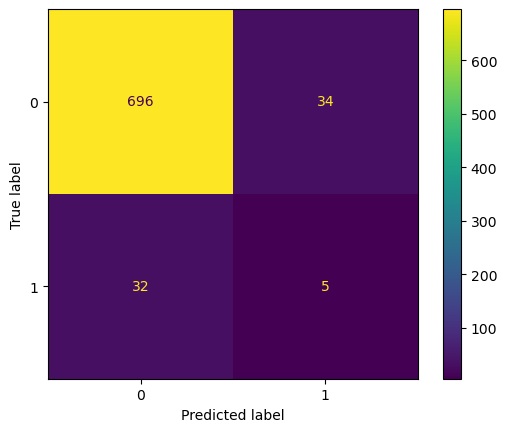

------------------------------


In [47]:
#we just get the recall error score
for model in Models:
    
    model[1].fit(x_train , y_train)
    
    y_train_pred = model[1].predict(x_train)
    y_test_pred = model[1].predict(x_test)
    train_recall = recall_score(y_true=y_train , y_pred=y_train_pred)
    test_recall = recall_score(y_true=y_test , y_pred=y_test_pred)
    print(model[0])
    print("Training set pred recall score : ",np.around(train_recall,2)* 100,'%' )
    print("Test set  pred recall score : ",np.around(test_recall,2)* 100,'%')
    print('matrix for train : \n')
    ConfusionMatrixDisplay(confusion_matrix(y_true=y_train , y_pred=y_train_pred)).plot()
    plt.show()
    print('matrix for test : \n')
    ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_pred)).plot()
    plt.show()
    print('-'*30)   

In [48]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train , y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
plt.figure(figsize=(100 , 100))
_ = plot_tree(dt , filled=True )
plt.show()

Training set pred recall score :  83.0 %
Test set  pred recall score :  89.0 %
matrix for train : 



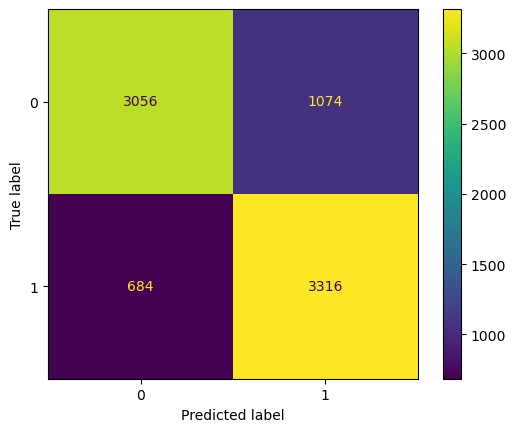

matrix for test : 



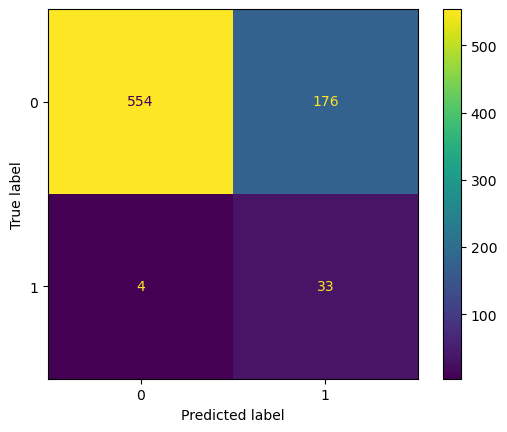

------------------------------


In [49]:
#save and load our model
#we evaluate and choose the best model which is random forest
#save
lr=LogisticRegression()
lr.fit(x_train , y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
train_recall = recall_score(y_true=y_train , y_pred=y_train_pred)
test_recall = recall_score(y_true=y_test , y_pred=y_test_pred)
print("Training set pred recall score : ",np.around(train_recall,2)* 100,'%' )
print("Test set  pred recall score : ",np.around(test_recall,2)* 100,'%')
print('matrix for train : \n')
ConfusionMatrixDisplay(confusion_matrix(y_true=y_train , y_pred=y_train_pred)).plot()
plt.show()
print('matrix for test : \n')
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_pred)).plot()
plt.show()
print('-'*30)   
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))

In [50]:
df_c.columns
df_c.to_csv('test-data.csv')

In [53]:
#reuse model and predict
#reuse the model
#load the model
pickled_model = pickle.load(open('model.pkl', 'rb'))
x_df = pd.read_csv('test-data.csv')
#Standarization
#create standard scaler object
scaler = StandardScaler()
x_df = scaler.fit_transform(x_df)
#predict
y=pickled_model.predict(x_df)
y

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([0], dtype=int64)